In [7]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

### 1. Generate Random Data

In [8]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 6

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply SMOTE

#### Using Imbalance Only

In [9]:
Xover, yover = smote(X, y; k = 100, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

┌ Warning: Warning: k=100 is larger than the number of samples for the class which is (25). Will set k=25-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/common_smote.jl:102


Progress:  40%|████████████████▍                        |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


┌ Warning: Warning: k=100 is larger than the number of samples for the class which is (11). Will set k=11-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/common_smote.jl:102


Progress:  11%|████▍                                    |  ETA: 0:00:01

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01


┌ Warning: Warning: k=100 is larger than the number of samples for the class which is (14). Will set k=14-1
└ @ Imbalance /Users/essam/Documents/GitHub/Imbalance.jl/src/common_smote.jl:102

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  class:  2


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.8684713840484619, 0.12323127686977386, 0.1355999857187271, 0.15742817521095276, 0.8133993744850159, 0.07462137937545776, 0.11554998904466629, 0.8163608908653259, 0.6201844811439514, 0.5747681260108948], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.29762786626815796, 0.4304981529712677, 0.4540780186653137, 0.8285843133926392, 0.31974127888679504, 0.5940703749656677, 0.7752786874771118, 0.20725876092910767, 0.350126713514328, 0.15280109643936157], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.1122621811440753

#### Using MLJ

In [10]:
smote_model = SMOTE(k=5, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(smote_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.8684713840484619, 0.12323127686977386, 0.1355999857187271, 0.15742817521095276, 0.8133993744850159, 0.07462137937545776, 0.11554998904466629, 0.8163608908653259, 0.6201844811439514, 0.5747681260108948], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.29762786626815796, 0.4304981529712677, 0.4540780186653137, 0.8285843133926392, 0.31974127888679504, 0.5940703749656677, 0.7752786874771118, 0.20725876092910767, 0.350126713514328, 0.15280109643936157], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.1122621811440753

#### Using TableTransforms

In [11]:
smote_model_t = SMOTE_t(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> smote_model_t

Progress:  40%|████████████████▍                        |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


(Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.8684713840484619, 0.12323127686977386, 0.1355999857187271, 0.15742817521095276, 0.8133993744850159, 0.07462137937545776, 0.11554998904466629, 0.8163608908653259, 0.6201844811439514, 0.5747681260108948],
 Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.29762786626815796, 0.4304981529712677, 0.4540780186653137, 0.8285843133926392, 0.31974127888679504, 0.5940703749656677, 0.7752786874771118, 0.20725876092910767, 0.350126713514328, 0.15280109643936157],
 Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 3. Plot the Results

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/julia/.julia/scratchspaces/a66863c6-20e8-4ff4-8a62-49f30b1f605e/agent-cache/default-macmini-aarch64-4.0/build/default-macmini-aarch64-4-0/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/Registry/Registry.jl:68
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/Manifest.toml`


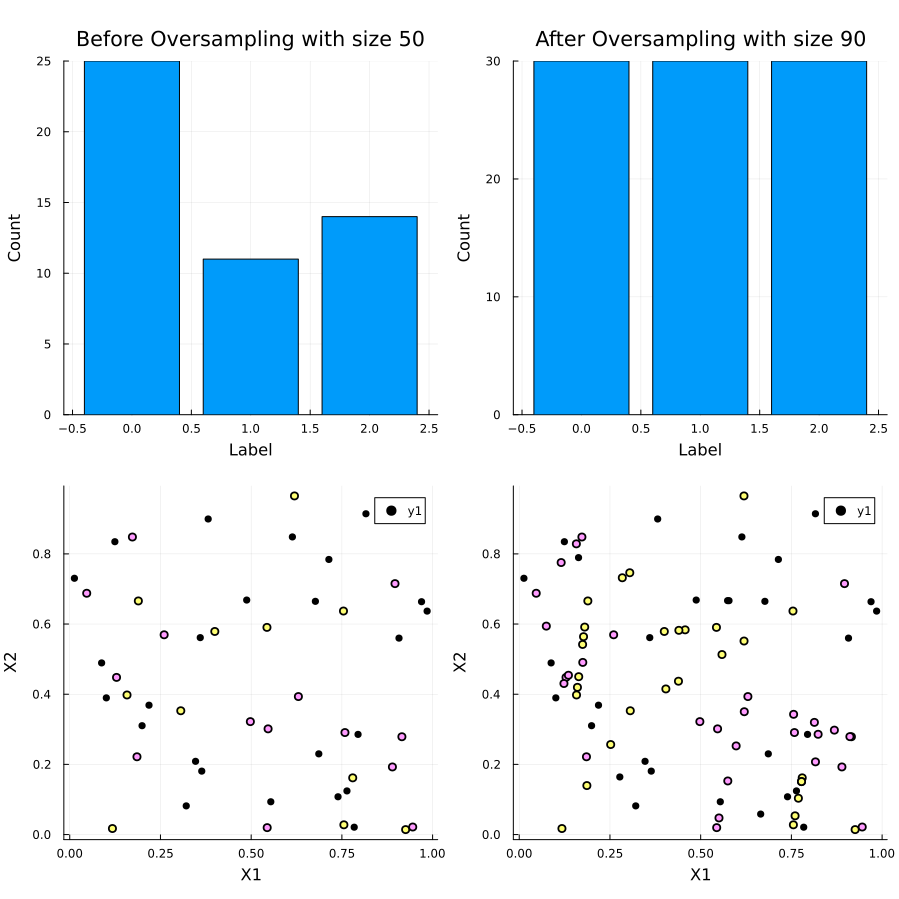

In [12]:
include("plot.jl")
plot_data(y, yover, X, Xover)